In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib tk

In [39]:
# Data set for plots, part 1 - simple
x = [1,2,3]
y = [4, 2, 3]
x2 = x
y2 = [i*3 for i in y]

In [54]:
# Data set for plots, part 2 - random, larger ranges
records = np.random.randint(1,101,1000)
records = records.tolist()
records2 = np.random.randint(1,101,1000)
records2 = records2.tolist()

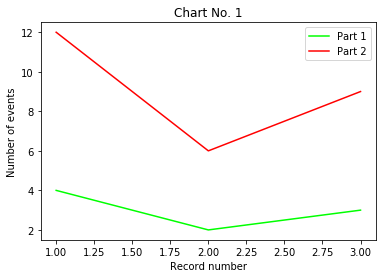

In [42]:
# Standard plot of two lines on one chart
plt.plot(x, y, label = "Part 1", color = "#00FF00")
plt.plot(x2, y2, label = "Part 2", color = "#FF0000")
plt.xlabel("Record number")
plt.ylabel("Number of events")
plt.title("Chart No. 1")
plt.legend()

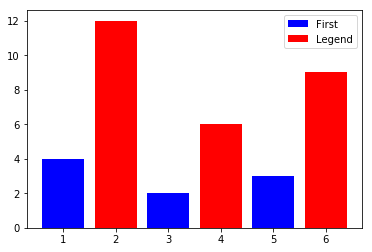

In [44]:
# Bar chart
plt.bar([1,3,5], y, color = 'blue', label = 'First')
plt.bar([2,4,6], y2, color = 'red', label = 'Legend')
plt.legend()

(array([104.,  91., 108.,  89.,  98., 115.,  93.,  98., 107.]),
 array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
 <a list of 9 Patch objects>)

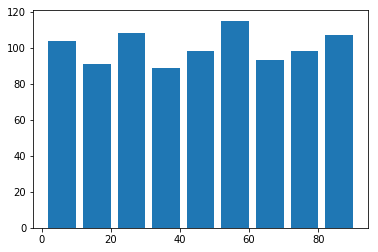

In [55]:
# Histogram
bins = range(1,101,10)
plt.hist(records, bins, rwidth=0.8)

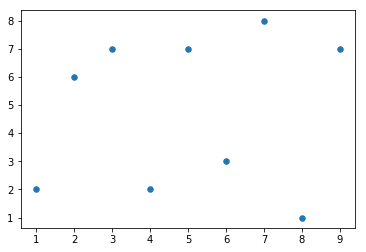

In [59]:
# Scatter plot
a = [1,2,3,4,5,6,7,8,9]
b = [2,6,7,2,7,3,8,1,7]
plt.scatter(a, b, label="a and b", s=30)

Text(0.5,1,'Time spent on each activity (daily)')

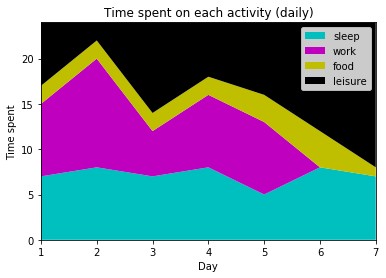

In [65]:
days =    [1,2,3,4,5,6,7]
sleep =   [7,8,7,8,5,8,7]
working = [8,12,5,8,8,0,0]
eating =  [2,2,2,2,3,4,1]
playing = [7,2,10,6,8,12,16]
activities = ['sleep', 'work', 'food', 'leisure']
colors = ['c', 'm', 'y', 'k']
plt.stackplot(days, sleep,working,eating,playing, labels=activities, colors=colors)
plt.legend()
plt.xlim(1,7)
plt.ylim(0,24)
plt.xlabel("Day")
plt.ylabel("Time spent")
plt.title("Time spent on each activity (daily)")

([<matplotlib.patches.Wedge at 0x1a8816ca8d0>,
 [Text(-0.336465,1.2557,'sleep'),
  Text(-1.09059,0.143579,'work'),
  Text(0.143579,-1.09059,'food'),
  Text(0.952628,0.55,'leisure')],
 [Text(-0.207055,0.772741,'8.3%'),
  Text(-0.594867,0.0783157,'29.2%'),
  Text(0.0783157,-0.594867,'29.2%'),
  Text(0.519615,0.3,'33.3%')])

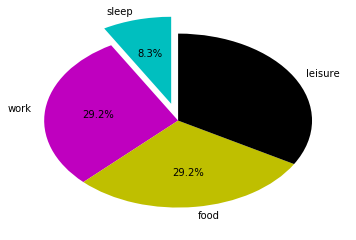

In [75]:
# Pie charts 
# Basing on the slice from the previous (stack plots)
elems = [7,8,2,7]
elems.sort()
elems_labels = ['sleep', 'work', 'food', 'leisure']
plt.pie(elems, labels=elems_labels, colors=colors, startangle=90, explode=(0.2,0,0,0), autopct='%1.1f%%')

In [85]:
# Opening csv file with bult-in library
import csv
x3 = []
y3 = []
with open('test2.csv', 'r') as file:
    csv_data = csv.reader(file, delimiter=',')
    for row in csv_data:
        x3.append(row[0])
        y3.append(row[1])
print(x3)
print(y3)

['ď»ż1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
['3', '4', '4', '41', '4', '4', '41', '4', '6', '1']


In [88]:
# Opening csv file with pandas
# Unpack allows for loading into separate lists
x4, y4 = np.genfromtxt('test2.csv', delimiter=',', unpack=True)
print(x4, y4)
# Recommend to use pandas

[nan  2.  3.  4.  5.  6.  7.  8.  9. 10.] [ 3.  4.  4. 41.  4.  4. 41.  4.  6.  1.]


In [265]:
# Getting API data
# Alpha Vantage api key: G10SY6DT9RCX2U2M
import urllib
import json
requested_data = urllib.request.urlopen("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=G10SY6DT9RCX2U2M").read().decode()
requested_data = json.loads(requested_data)
time_series = requested_data["Time Series (Daily)"]
dates = []
o = []
h = []
l = []
c = []
v = []
for item in time_series.items():
    dates.append(item[0])
    daily_data = item[1]
    o.append(daily_data['1. open'])
    h.append(daily_data['2. high'])
    l.append(daily_data['3. low'])
    c.append(daily_data['4. close'])
    v.append(daily_data['5. volume'])
    

In [271]:
# Converting OHLC data to floats and volume to int
for data_set in (o, h, l, c, v):
    for pos, data in enumerate(data_set):
        if '.' in data:
            data_set[pos] = float(data)
        else:
            data_set[pos] = int(data)
# Converting dates to np date format
dates = np.array(dates).astype("datetime64[s]")

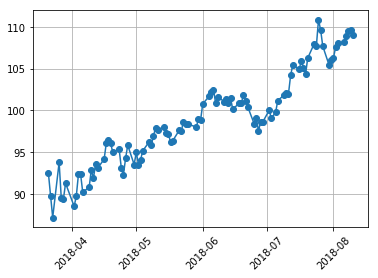

In [150]:
# Adding first subplot to the price chart
fig = plt.figure()
#ax1 = plt.subplot2grid((1,1), (0,0))
ax1 = plt.subplot(1,1,1)
ax1.plot_date(dates, c, ls='-', label='Price')
# Modifying x tick labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
ax1.grid(True)
# plt.subplots_adjust allows to change toolbar option

In [152]:
# Handling the unix time
import time
from datetime import datetime as dt
# Unix time
now = time.time()
print(now)
# Converted
now_converted = dt.fromtimestamp(now)
print(now_converted)
# Preparing function that can do it with block of data and return an vector
converter = np.vectorize(dt.fromtimestamp)
now_converted_2 = converter(now)
print(now_converted_2)

1533991160.6918232
2018-08-11 14:39:20.691823
2018-08-11 14:39:20.691823


In [233]:
# Comparable list 
comparable = [101 for i in range(len(c))]
comparable = np.array(comparable)


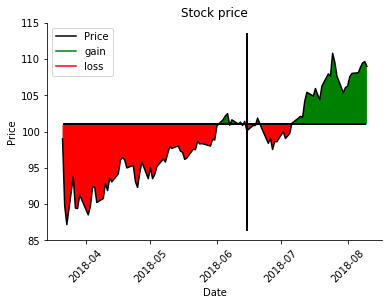

In [246]:
# Chart customization
# Adding first subplot to the price chart
fig = plt.figure()
#ax1 = plt.subplot2grid((1,1), (0,0))
ax1 = plt.subplot(1,1,1)
ax1.plot(dates, c, ls='solid', label='Price', color='k')
ax1.plot([], [], ls='-', color='green', label='gain')
ax1.plot([], [], ls='-', color='red', label='loss')
# Comparable has to numpy.ndarray
ax1.fill_between(dates, c, 101, where=c>=comparable, facecolor='green', interpolate=True)
ax1.fill_between(dates, c, 101, where=c<=comparable, facecolor='red', interpolate=True)
ax1.axhline(101, 0.05, 0.95, linewidth=2, color='black')
ax1.axvline('2018-06-15', 0.05, 0.95, linewidth=2, color='black')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
# ax1.fill_between(dates, c, 101, where=c<=comparable, facecolor='green', interpolate=True)
# Modifying x tick labels (rotate)
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
# ax1.grid(True)
# plt.subplots_adjust allows to change toolbar option
ax1.xaxis.set_label_text("Date")
ax1.yaxis.set_label_text("Price")
ax1.yaxis.set_ticks(range(85,116,5))
ax1.set_title("Stock price")
plt.legend()

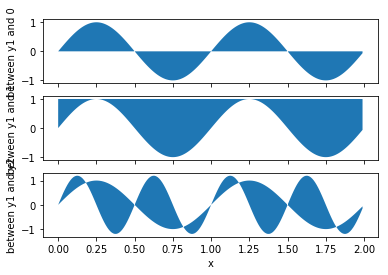

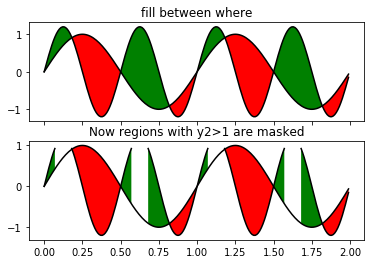

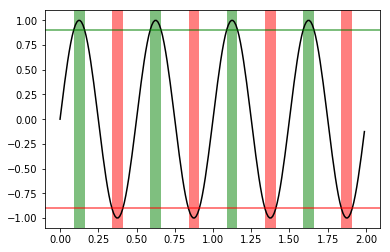

In [210]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.fill_between(x, 0, y1)
ax1.set_ylabel('between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_ylabel('between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_ylabel('between y1 and y2')
ax3.set_xlabel('x')

# now fill between y1 and y2 where a logical condition is met.  Note
# this is different than calling
#   fill_between(x[where], y1[where],y2[where]
# because of edge effects over multiple contiguous regions.
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)
ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax.set_title('fill between where')

# Test support for masked arrays.
y2 = np.ma.masked_greater(y2, 1.0)
ax1.plot(x, y1, x, y2, color='black')
ax1.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True)
ax1.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax1.set_title('Now regions with y2>1 are masked')

# This example illustrates a problem; because of the data
# gridding, there are undesired unfilled triangles at the crossover
# points.  A brute-force solution would be to interpolate all
# arrays to a very fine grid before plotting.

# show how to use transforms to create axes spans where a certain condition is satisfied
fig, ax = plt.subplots()
y = np.sin(4*np.pi*x)
ax.plot(x, y, color='black')

# use the data coordinates for the x-axis and the axes coordinates for the y-axis
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.9
ax.axhline(theta, color='green', lw=2, alpha=0.5)
ax.axhline(-theta, color='red', lw=2, alpha=0.5)
ax.fill_between(x, 0, 1, where=y > theta, facecolor='green', alpha=0.5, transform=trans)
ax.fill_between(x, 0, 1, where=y < -theta, facecolor='red', alpha=0.5, transform=trans)

In [499]:
# Create SMA-7
window = 14
window_s = window
weigths = np.repeat(1.0, window)/window
sma_slow = np.convolve(c, weigths, 'valid')

# Create SMA-14
window = 3
window_f = window
weigths = np.repeat(1.0, window)/window
sma_faster = np.convolve(c, weigths, 'valid')

# Create h-l indicator
hl_indicator = list(map((lambda x, y: x-y), h,l))

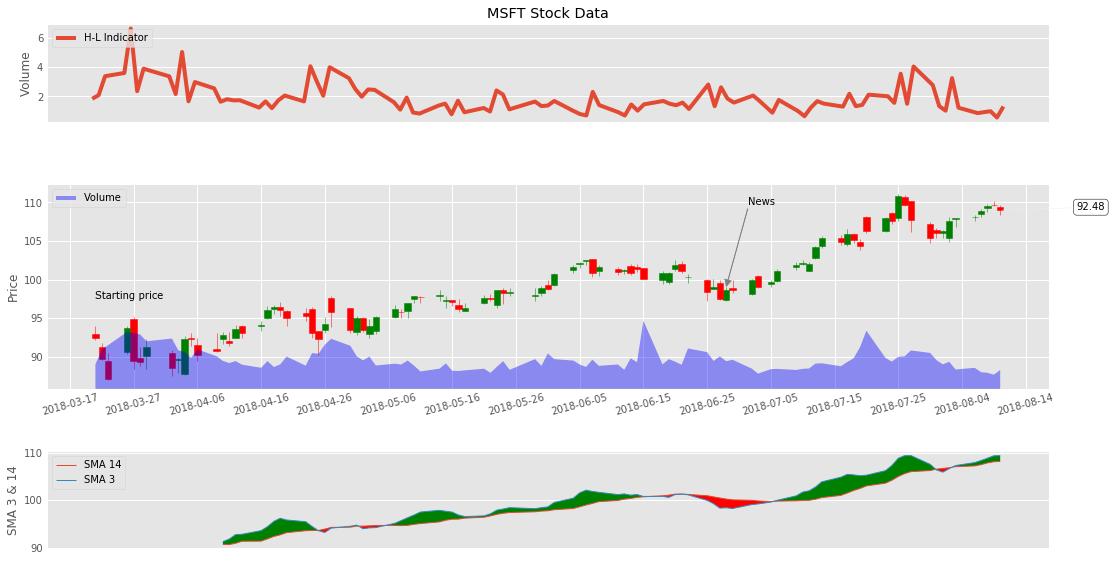

In [508]:
import mpl_finance
from datetime import datetime
from matplotlib import dates as mpl_dates
from matplotlib import ticker as mpl_ticker
from matplotlib import style as mpl_style

mpl_style.use('ggplot')

fig = plt.figure(figsize=(16,9))
ax2 = plt.subplot2grid((10,1), (0,0), rowspan=2, colspan=1)
ax1 = plt.subplot2grid((10,1), (3,0), rowspan=4, colspan=1, sharex=ax1)
ax1v = ax1.twinx()
ax3 = plt.subplot2grid((10,1), (8,0), rowspan=2, colspan=1, sharex=ax1)

dates_converted = [datetime.strptime(str(x), '%Y-%m-%dT%H:%M:%S') for x in dates]
dates_converted = mpl_dates.date2num(dates_converted)
zipped_prices = zip(dates_converted,o,c,h,l)

mpl_finance.candlestick_ochl(ax1, zipped_prices, width=1, colorup='green', colordown='red')
ax1v.plot([], [], label="Volume", color='blue', alpha=0.4)
ax1v.fill_between(dates_converted, 0, v, facecolor='blue', alpha=0.4)
ax2.plot(dates_converted, hl_indicator, label='H-L Indicator')
ax3.plot(dates_converted[:(len(sma_slow))], list(sma_slow), label=('SMA %i' % window_s), lw=1)
ax3.plot(dates_converted[:(len(sma_slow))], list(sma_faster[:(len(sma_slow))]), label=('SMA %i' % window_f), lw=1)
ax3.fill_between(dates_converted[:(len(sma_slow))], list(sma_faster[:(len(sma_slow))]), list(sma_slow),
                 where=((sma_faster[:(len(sma_slow))])>=(sma_slow)), facecolor='green', interpolate=True)
ax3.fill_between(dates_converted[:(len(sma_slow))], list(sma_faster[:(len(sma_slow))]), list(sma_slow),
                 where=((sma_faster[:(len(sma_slow))])<=(sma_slow)), facecolor='red', interpolate=True)

   
# Configure overlaying volume chart
ax1v.axes.yaxis.set_ticklabels([])
ax1v.grid(False)
ax1v.set_ylim(0, max(v)*3)

# Formatting main date axis (date, cutting number of tick labels and rotating)
# Using major_locator first or last label can be removed with prune    
ax1.xaxis.set_major_formatter(mpl_dates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mpl_ticker.MaxNLocator(16))
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(15)
# Disable xaxis on the indicator charts
ax2.xaxis.set_visible(False)
ax3.xaxis.set_visible(False)

# Adding text
font_dict = {'family': 'Verdana', 'size':10}
ax1.text(dates_converted[-1], c[-1]+5, 'Starting price', fontdict=font_dict)
# Adding annotation on the chart
arrow_props = dict(color='grey', width=0.5, headlength=7, headwidth=7)
ax1.annotate("News", (dates_converted[30], h[30]), xytext=(0.7, 0.9), textcoords='axes fraction', arrowprops=arrow_props)
# Annotation as last price indicator
bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='black')
ax1.annotate(str(c[-1]), (dates_converted[0], c[0]), xytext=(dates_converted[0]+12, c[0]), bbox=bbox_props, arrowprops=dict(arrowstyle='-'))

# Additional information on the chart
ax1.set_ylabel('Price')
ax2.set_ylabel('Volume')
ax3.set_ylabel('SMA %i & %i' % (window_f, window_s))
ax2.set_title('MSFT Stock Data')

# Add chart legend
ax1v.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend()

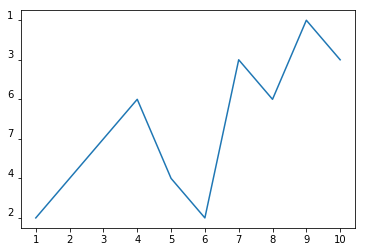

In [290]:
# Animation function
from matplotlib import animation

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    file = open('testing_data.txt', 'r')
    lines = file.readlines()
    xs = []
    ys = []
    for line in lines:
        x, y = line.split(',')
        xs.append(x)
        ys.append(y)
        
    ax1.clear()
    ax1.plot(xs, ys)
    
ani = animation.FuncAnimation(fig, animate, 1000)

In [341]:
# Creating sample data

ry = np.random.randint(1,10,20).tolist()
rx = np.arange(1,21,1).tolist()
print(rx)
print(ry)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[3, 5, 7, 2, 6, 6, 2, 6, 3, 9, 6, 5, 3, 5, 3, 5, 5, 5, 9, 6]


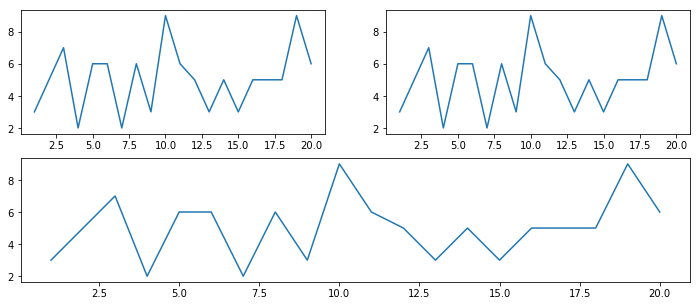

In [388]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,1,2)

ax1.plot(rx,ry)
ax2.plot(rx,ry)
ax3.plot(rx,ry)

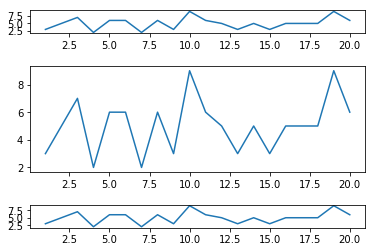

In [ ]:
fig = plt.figure()
ax1 = plt.subplot2grid((8,1), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((8,1), (2,0), rowspan=4, colspan=1)
ax3 = plt.subplot2grid((8,1), (7,0), rowspan=1, colspan=1)

ax1.plot(rx, ry)
ax2.plot(rx, ry)
ax3.plot(rx, ry)

In [38]:
# 3-D Plots
from mpl_toolkits.mplot3d import axes3d
import math

fig = plt.figure(figsize=(16,9))
ax1 = fig.add_subplot(2,2,1, projection='3d')
ax2 = fig.add_subplot(2,2,2, projection='3d')

x_dat = list(range(1,101,1))
y_dat = np.random.randint(1,100,100).tolist()
z_dat = np.random.randint(1,100,100).tolist()

x_dat = list(range(1,1000))
y_dat = [math.log(i, 2) for i in x_dat]
z_dat = [math.sin(i/10) for i in x_dat]

X, Y, Z = axes3d.get_test_data(0.05)
ax1.plot_wireframe(X, Y, Z)
ax2.plot(x_dat, y_dat, z_dat)

In [36]:
# 3-D Scatter plots
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1, projection='3d')

x_dat = list(range(1,1001,1))
y_dat = np.random.randint(1,10,1000).tolist()
z_dat = np.random.randint(1,10,1000).tolist()

y_dat_minus = [-y for y in y_dat]

ax1.scatter(x_dat, y_dat, z_dat, color='green')
ax1.scatter(x_dat, y_dat_minus, z_dat, color='red')

In [44]:
# 3-D Bar charts
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1, projection='3d')
x_dat = list(range(1,11,1))
y_dat = [8,7,4,6,1,2,3,4,8,2]
z_dat = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [2,5,7,6,4,1,5,6,7,3]

ax1.bar3d(x_dat, y_dat, z_dat, dx, dy, dz)
ax1.set_ylabel("Y")
ax1.set_xlabel("X")
ax1.set_zlabel("Z")

Text(0.5,0,'Z')

In [53]:
# 3-D Flat-bar
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1, projection='3d')
x_dat = list(range(1,11,1))
y_dat = [1] * 10
z_dat = np.zeros(10)

dx = [0.9] * 10
dy = np.zeros(10)
dz = [2,5,7,6,4,1,5,6,7,3]

ax1.bar3d(x_dat, y_dat, z_dat, dx, dy, dz, color = 'red', alpha=0.5)
y_dat = [4] * 10
ax1.bar3d(x_dat, y_dat, z_dat, dx, dy, dz, color = 'blue', alpha=0.5)
y_dat = [7] * 10
ax1.bar3d(x_dat, y_dat, z_dat, dx, dy, dz, color = 'yellow', alpha=0.5)
ax1.set_ylabel("Y")
ax1.set_xlabel("X")
ax1.set_zlabel("Z")

Text(0.5,0,'Z')